# Fake news detection on Hindi news articles using Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fake_news=pd.read_csv('Data/fake_news_basic.csv')
true_news=pd.read_csv('Data/true_news_basic.csv')

In [3]:
# make both length equal
if len(fake_news) > len(true_news):
  fake_news = fake_news.head(len(true_news))
elif len(true_news) > len(fake_news):
  true_news = true_news.head(len(fake_news))
print("Length of fake news: ", len(fake_news))
print("Length of true news: ", len(true_news))

Length of fake news:  760
Length of true news:  760


In [5]:
true_news['label']=1
fake_news['label']=0
news = pd.concat([fake_news, true_news])
#df=pd.DataFrame(news)
#df.to_csv("news.csv")
len(news)

1520

In [6]:

input_array=np.array(news['short_description'])


In [7]:
# stopwords
hindi =[
 'अत','अपना','अपनी','अपने','अभी','अंदर','आदि','आप','इत्यादि','इन','इनका','इन्हीं','इन्हें','इन्हों','इस','इसका','इसकी','इसके','इसमें',
'इसी','इसे','उन','उनका','उनकी','उनके','उनको','उन्हीं','उन्हें','उन्हों','उस','उसके','उसी','उसे','एक','एवं','एस','ऐसे','और','कई',
'कर','करता','करते','करना','करने','करें','कहते','कहा','का','काफ़ी','कि','कितना','किन्हें','किन्हों','किया','किर','किस','किसी','किसे','की',
'कुछ','कुल','के','को','कोई','कौन','कौन','बही','बहुत','बाद','बाला','बिलकुल','भी','भीतर','मगर','मानो','मे','में','यदि','यह','यहाँ','यही',
'या','यिह','ये','रखें','रहा','रहे','ऱ्वासा','लिए','लिये','लेकिन','व','वग़ैरह','वर्ग','वह','वहाँ','वहीं','वाले','वुह','वे','सकता','सकते','सबसे',
'सभी','साथ','साबुत','साभ','सारा','से','सो','संग','ही','हुआ','हुई','हुए','है','हैं','हो','होता','होती','होते','होना','होने']

In [8]:
import re
import nltk
# ltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1520):
    review = input_array[i]
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(hindi)]
    review = ' '.join(review)
    corpus.append(review)
corpus[:10]

['बूम पाय इमरान खान भारत सरकार आलोच रह वर्तमान शासन अधिनायकवाद मुस्लिम विरोध पाकिस्तान',
 'सिख समुदाय लोग हिंद साइन बोर्ड कालिख पोत दिख तस्वीर सेट वीडिय वायरल रह',
 'सोशल मीडिय प्लेटफ़ॉर्म फ़ेसबुक ट्विटर दाव बड़ संख्य तस्वीर पोस्ट शेयर किय रह है।',
 'दाव भाजप मा सरकार जन गलत रह ।',
 'मीडिय आउटलेट्स वायर एजेंस गलत तरीक दाव किय पाकिस्तान पूर्व राजनयिक बालाकोट मौत',
 'यूज़र्स तस्वीर शेयर दाव रह तस्वीर पुरा दिल्ल रेलव स्टेशन प्लेटफ़ॉर्म बन मस्जिद',
 'बूम पाय मूल तस्वीर साल 2014 अमित शाह प्रधानमंत्र नरेंद्र मोद बध दे रह थे।',
 'बूम पाय वायरल तस्वीर साल 2018 उत्तर प्रदेश उन्नाव हत्य है।',
 'दाव कोविड-19 टीक लिंग लग वायरस जल्द राहत मिल',
 'दाव वायरल ब्रिटेन प्रधानमंत्र किसान आंदोलन कारण भारत दौर रद्द किय']

In [9]:
print(type(corpus))

<class 'list'>


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(corpus).toarray()
y = news.iloc[0:1520, -1].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [12]:
len(X_train),len(y_train),len(X_test),len(y_test)

(1216, 1216, 304, 304)

In [13]:
# Printer
def printer(name):
    ax= plt.subplot()
    confusion_matrix = pd.crosstab(y_test,y_predR, rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(confusion_matrix, annot=True)
    name = 'Confusion Matrix - ' + name
    ax.set_title(name, size=16)
    plt.savefig('2-confusion matrix.jpg',bbox_inches = 'tight',transparent=True)
    plt.show()
    ax= plt.subplot()
    confusion_matrix = pd.crosstab(y_test,y_predR, rownames=['Actual'], colnames=['Predicted'], margins = True)
    ax.set_title(name, size=16)
    sn.heatmap(confusion_matrix, annot=True)
    plt.savefig('3-confusion matrix.jpg',bbox_inches = 'tight',transparent=True)
    plt.show()
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    auc = roc_auc_score(y_test,probs)
    print(auc)
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.savefig('roc curve.jpg',bbox_inches = 'tight',transparent=True)
    plt.show()

## Random Forest Tree Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model = classifier3.fit(X_train, y_train)

# Predicting the Test set results
y_predR = classifier3.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_predR)

from sklearn.metrics import accuracy_score
score_rftc = accuracy_score(y_test,y_predR)

print(score_rftc)
print(cm3)

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
my_pipeline = make_pipeline(imputer, RandomForestClassifier())

from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_predR,labels=[1,0])
print('Classification report : \n',matrix)


0.8256578947368421
[[137  26]
 [ 27 114]]
[-0.18092105 -0.14802632 -0.16447368 -0.14802632 -0.19407895]
Mean Absolute Error 0.167105
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.81      0.81       141
           0       0.84      0.84      0.84       163

    accuracy                           0.83       304
   macro avg       0.82      0.82      0.82       304
weighted avg       0.83      0.83      0.83       304



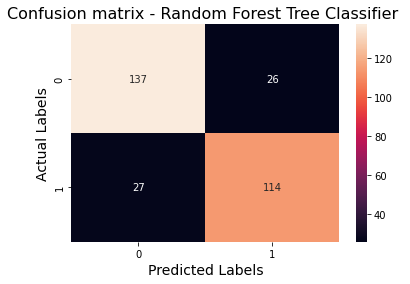

In [20]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
ax= plt.subplot()
plt.style.use('seaborn-pastel')
confusion_matrix = pd.crosstab(y_test,y_predR, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(cm3, annot=True,fmt='g')
ax.set_xlabel('Predicted Labels', size=14)
ax.set_ylabel('Actual Labels', size=14)
ax.set_title('Confusion matrix - Random Forest Tree Classifier ', size=16)
plt.savefig('2-confusion matrix rftc.jpg',bbox_inches = 'tight',transparent=True)
plt.show()




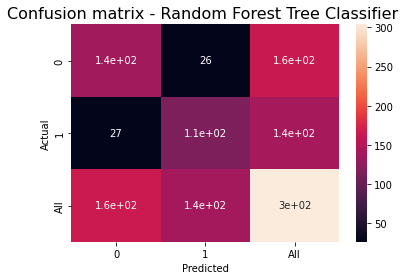

In [15]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
ax= plt.subplot()
confusion_matrix = pd.crosstab(y_test,y_predR, rownames=['Actual'], colnames=['Predicted'], margins = True)
ax.set_title('Confusion matrix - Random Forest Tree Classifier ', size=16)
sn.heatmap(confusion_matrix, annot=True)
plt.savefig('3-confusion matrix rftc.jpg',bbox_inches = 'tight',transparent=True)
plt.show()

0.8968367924117827


C:\Users\hp pc\AppData\Local\Temp\ipykernel_11536\3626138341.py:14: UserWarning: Legend does not support 0.8968367924117827 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([auc],['roc_acu_score ='])


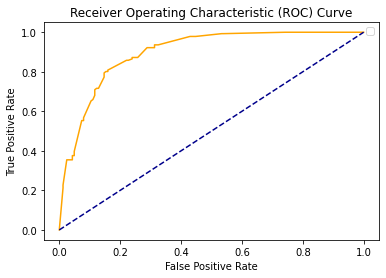

In [16]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score

probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
auc = roc_auc_score(y_test,probs)
print(auc)
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend([auc],['roc_acu_score ='])
plt.savefig('roc curve rftc.jpg',bbox_inches = 'tight',transparent=True)
plt.show()

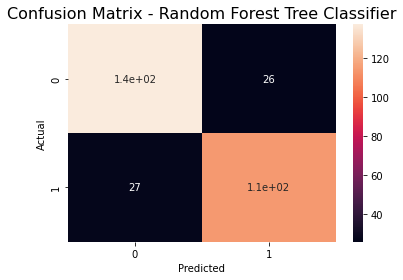

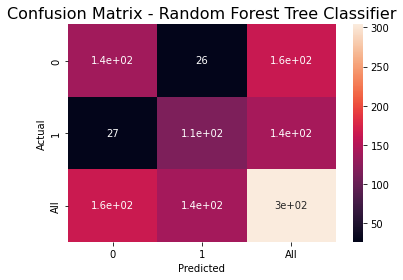

0.8968367924117827


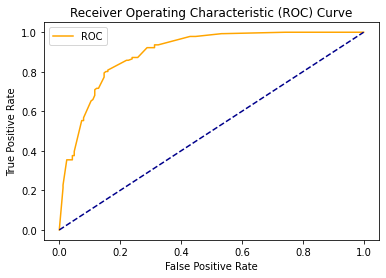

In [17]:
name = 'Random Forest Tree Classifier'
printer(name)

## Gaussian Naive Bayes

In [18]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
model = classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score
score_gnb = accuracy_score(y_test,y_pred)

print(score_gnb)
print(cm)

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
my_pipeline = make_pipeline(imputer, GaussianNB())

from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)
print('Mean Absolute Error %2f' %(-1 * scores.mean()))


# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)


0.75
[[145  18]
 [ 58  83]]
[-0.25986842 -0.30263158 -0.31578947 -0.25328947 -0.32565789]
Mean Absolute Error 0.291447
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.59      0.69       141
           0       0.71      0.89      0.79       163

    accuracy                           0.75       304
   macro avg       0.77      0.74      0.74       304
weighted avg       0.76      0.75      0.74       304



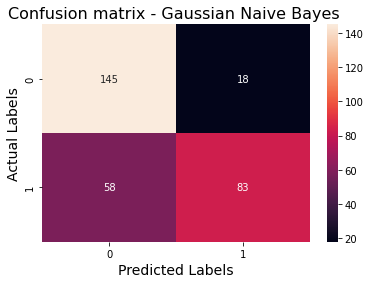

In [19]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
ax= plt.subplot()
plt.style.use('seaborn-pastel')
confusion_matrix = pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(cm, annot=True,fmt='g')
ax.set_xlabel('Predicted Labels', size=14)
ax.set_ylabel('Actual Labels', size=14)
ax.set_title('Confusion matrix - Gaussian Naive Bayes ', size=16)
plt.savefig('2-confusion matrix Gaussian Naive Bayes.jpg',bbox_inches = 'tight',transparent=True)
plt.show()


0.86046208066832


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Legend does not support 0.86046208066832 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


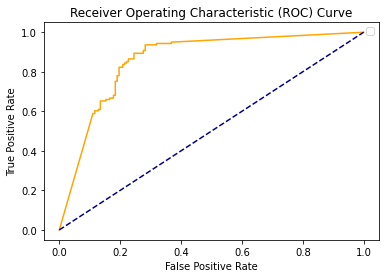

In [26]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score

probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
auc = roc_auc_score(y_test,probs)
print(auc)
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend([auc],['roc_acu_score ='])
plt.savefig('roc curve gnb.jpg',bbox_inches = 'tight',transparent=True)
plt.show()

## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
model = classifier1.fit(X_train, y_train)

# Predicting the Test set results
y_predL = classifier1.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_predL)
from sklearn.metrics import accuracy_score
score_lr = accuracy_score(y_test,y_predL)

print(score_lr)
print(cm1)

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
my_pipeline = make_pipeline(imputer, LogisticRegression())

from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_predL,labels=[1,0])
print('Classification report : \n',matrix)


0.8355263157894737
[[134  29]
 [ 21 120]]
[-0.15131579 -0.18421053 -0.19407895 -0.15789474 -0.15131579]
Mean Absolute Error 0.167763
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.85      0.83       141
           0       0.86      0.82      0.84       163

    accuracy                           0.84       304
   macro avg       0.83      0.84      0.84       304
weighted avg       0.84      0.84      0.84       304



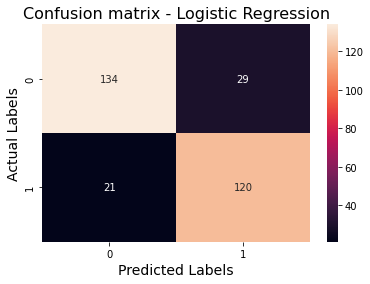

In [21]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
ax= plt.subplot()
plt.style.use('seaborn-pastel')
confusion_matrix = pd.crosstab(y_test,y_predL, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(cm1, annot=True,fmt='g')
ax.set_title('Confusion matrix - Logistic Regression', size=16)
ax.set_xlabel('Predicted Labels', size=14)
ax.set_ylabel('Actual Labels', size=14)
plt.savefig('2-confusion matrix Logistic Regression.jpg',bbox_inches = 'tight',transparent=True)
plt.show()



0.9249445242135492


C:\Users\hp pc\AppData\Local\Temp\ipykernel_11536\3401845338.py:14: UserWarning: Legend does not support 0.9249445242135492 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([auc],['roc_acu_score ='])


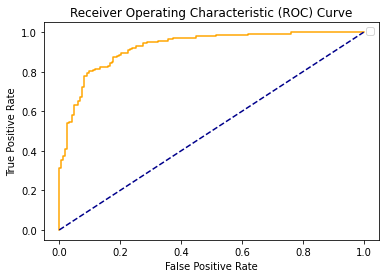

In [22]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score

probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
auc = roc_auc_score(y_test,probs)
print(auc)
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend([auc],['roc_acu_score ='])
plt.savefig('roc curve Logistic Regression.jpg',bbox_inches = 'tight',transparent=True)
plt.show()

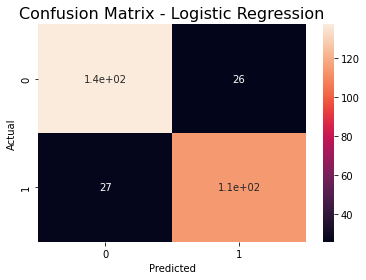

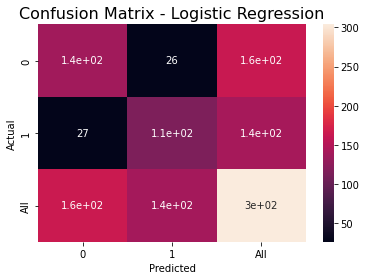

0.9249445242135492


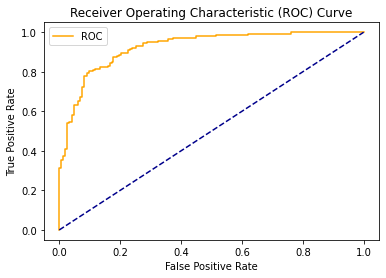

In [23]:
name = 'Logistic Regression'
printer(name)

## Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model = classifier2.fit(X_train, y_train)

# Predicting the Test set results
y_predD = classifier2.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_predD)
from sklearn.metrics import accuracy_score
score_dtc = accuracy_score(y_test,y_predD)

print(score_dtc)

print(cm2)

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
my_pipeline = make_pipeline(imputer, DecisionTreeClassifier())

from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_predD,labels=[1,0])
print('Classification report : \n',matrix)


0.8223684210526315
[[133  30]
 [ 24 117]]
[-0.26315789 -0.21710526 -0.20723684 -0.23684211 -0.25328947]
Mean Absolute Error 0.235526
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.83      0.81       141
           0       0.85      0.82      0.83       163

    accuracy                           0.82       304
   macro avg       0.82      0.82      0.82       304
weighted avg       0.82      0.82      0.82       304



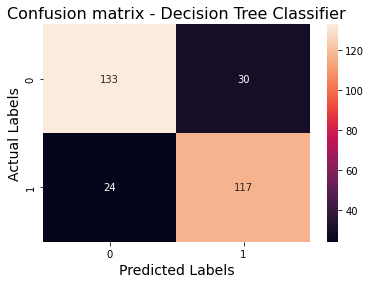

In [32]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
ax= plt.subplot()
plt.style.use('seaborn-pastel')
confusion_matrix = pd.crosstab(y_test,y_predD, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(cm2, annot=True,fmt='g')
ax.set_xlabel('Predicted Labels', size=14)
ax.set_ylabel('Actual Labels', size=14)
ax.set_title('Confusion matrix - Decision Tree Classifier', size=16)
plt.savefig('2-confusion matrix Decision Tree Classifier.jpg',bbox_inches = 'tight',transparent=True)
plt.show()



0.8456467824043858


C:\Users\hp pc\AppData\Local\Temp\ipykernel_11536\3825177668.py:14: UserWarning: Legend does not support 0.8456467824043858 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([auc],['roc_acu_score ='])


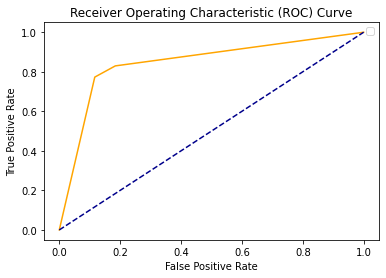

In [25]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score

probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
auc = roc_auc_score(y_test,probs)
print(auc)
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend([auc],['roc_acu_score ='])
plt.savefig('roc curve Decision Tree Classifier.jpg',bbox_inches = 'tight',transparent=True)
plt.show()

## Support Vector Machine(SVM)

In [26]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',probability=True, random_state = 0)
model = classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predS = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test, y_predS)
from sklearn.metrics import accuracy_score
score_svm = accuracy_score(y_test,y_predS)

print(score_svm)
print(cm5)

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
my_pipeline = make_pipeline(imputer, SVC())

from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)
print('Mean Absolute Error %2f' %(-1 * scores.mean()))


# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_predS,labels=[1,0])
print('Classification report : \n',matrix)


0.819078947368421
[[133  30]
 [ 25 116]]
[-0.16776316 -0.13815789 -0.16447368 -0.14802632 -0.17434211]
Mean Absolute Error 0.158553
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.82      0.81       141
           0       0.84      0.82      0.83       163

    accuracy                           0.82       304
   macro avg       0.82      0.82      0.82       304
weighted avg       0.82      0.82      0.82       304



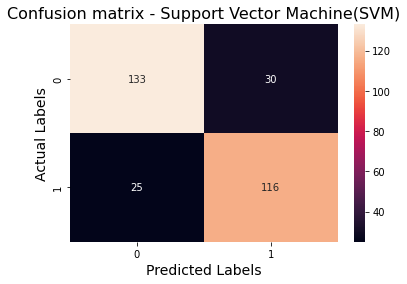

In [27]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
ax= plt.subplot()
plt.style.use('seaborn-pastel')
confusion_matrix = pd.crosstab(y_test,y_predS, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(cm5, annot=True,fmt='g')
ax.set_xlabel('Predicted Labels', size=14)
ax.set_ylabel('Actual Labels', size=14)
ax.set_title('Confusion matrix - Support Vector Machine(SVM)', size=16)
plt.savefig('2-confusion matrix Support Vector Machine(SVM).jpg',bbox_inches = 'tight',transparent=True)
plt.show()



0.9123700126180221


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Legend does not support 0.9123700126180221 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


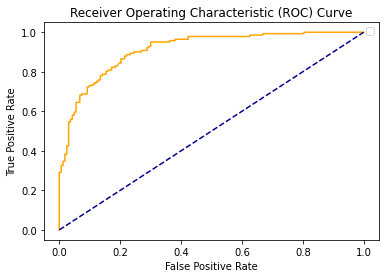

In [36]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score

probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
auc = roc_auc_score(y_test,probs)
print(auc)
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend([auc],['roc_acu_score ='])
plt.savefig('roc curve Support Vector Machine(SVM).jpg',bbox_inches = 'tight',transparent=True)
plt.show()

## K-Nearest Neighbour

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model = classifier4.fit(X_train, y_train)

# Predicting the Test set results
y_predK = classifier4.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_predK)
from sklearn.metrics import accuracy_score
score_knn = accuracy_score(y_test,y_predK)

print(score_knn)
print(cm4)

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
my_pipeline = make_pipeline(imputer, KNeighborsClassifier())

from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)
print('Mean Absolute Error %2f' %(-1 * scores.mean()))


# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_predK,labels=[1,0])
print('Classification report : \n',matrix)


0.7072368421052632
[[104  59]
 [ 30 111]]
[-0.375      -0.27631579 -0.26315789 -0.32236842 -0.34868421]
Mean Absolute Error 0.317105
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.79      0.71       141
           0       0.78      0.64      0.70       163

    accuracy                           0.71       304
   macro avg       0.71      0.71      0.71       304
weighted avg       0.72      0.71      0.71       304



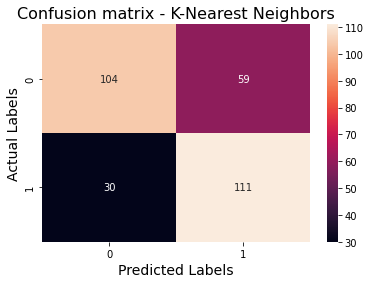

In [29]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
ax= plt.subplot()
plt.style.use('seaborn-pastel')
confusion_matrix = pd.crosstab(y_test,y_predK, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(cm4, annot=True,fmt='g')
ax.set_xlabel('Predicted Labels', size=14)
ax.set_ylabel('Actual Labels', size=14)
ax.set_title('Confusion matrix - K-Nearest Neighbors', size=16)
plt.savefig('2-confusion matrix K-Nearest Neighbors .jpg',bbox_inches = 'tight',transparent=True)
plt.show()



0.7606274202671539


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Legend does not support 0.7606274202671539 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


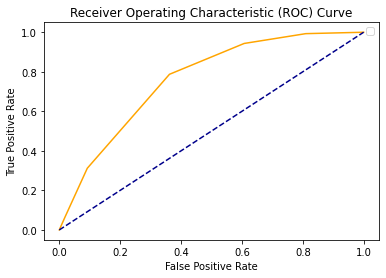

In [39]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score

probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
auc = roc_auc_score(y_test,probs)
print(auc)
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend([auc],['roc_acu_score ='])
plt.savefig('roc curve K-Nearest Neighbour.jpg',bbox_inches = 'tight',transparent=True)
plt.show()

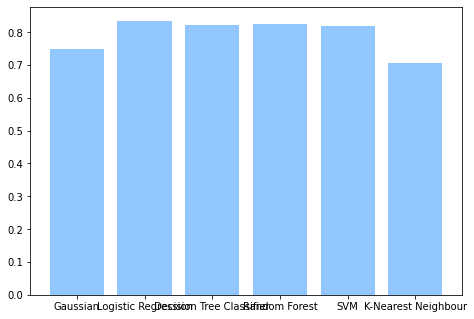

In [30]:
# Visualizations
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Gaussian', 'Logistic Regression', 'Decision Tree Classifier', 'Random Forest', 'SVM','K-Nearest Neighbour']
accuracy_score = [score_gnb,score_lr,score_dtc,score_rftc,score_svm,score_knn]
ax.bar(langs,accuracy_score)
plt.show()

In [31]:
accuracy_score

[0.75,
 0.8355263157894737,
 0.8223684210526315,
 0.8256578947368421,
 0.819078947368421,
 0.7072368421052632]